In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/Colab_Project/glaucoma")))
path = "/content/drive/My Drive/Colab_Project/glaucoma"
print(len(os.listdir(path+"/train/class0"))+len(os.listdir(path+"/test/class0")))
print(len(os.listdir(path+"/train/class1"))+len(os.listdir(path+"/test/class1")))

['train', 'test', 'Gmodel.h5']
287
232


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#trying to add a third convulational layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
batch_size=32
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 455/batch_size,
epochs = 30,
validation_data = test_set,
validation_steps = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
14/14 [==============================] - 42s 3s/step - loss: 0.9439 - accuracy: 0.5376 - val_loss: 0.7837 - val_accuracy: 0.4062
Epoch 2/30
14/14 [==============================] - 39s 3s/step - loss: 0.6827 - accuracy: 0.5852 - val_loss: 0.5173 - val_accuracy: 0.7188
Epoch 3/30
14/14 [==============================] - 40s 3s/step - loss: 0.5561 - accuracy: 0.6674 - val_loss: 0.5848 - val_accuracy: 0.5938
Epoch 4/30
14/14 [==============================] - 41s 3s/step - loss: 0.4873 - accuracy: 0.7412 - val_loss: 0.5304 - val_accuracy: 0.7188
Epoch 5/30
14/14 [==============================] - 39s 3s/step - loss: 0.5328 - accuracy: 0.7115 - val_loss: 0.5173 - val_accuracy: 0.7500
Epoch 6/30
14/14 [==============================] - 40s 3s/step - loss: 0.4747 - accuracy: 0.7668 - val_loss: 0.6596 - val_accuracy: 0.6875
Epoch 7/30
14/14 [==============================] - 40s 3s/step - loss: 0.4514 - accuracy: 0.7894 - val_loss: 0.4012 - val_accuracy: 0.8438
Epoch 8/30
14/14 [==

In [ ]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1]*100)
#print("Accuracy = ",score[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


 Total:  64
Loss:  0.31923454999923706 Accuracy:  82.8125


In [ ]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')

In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')
print("model loaded")


model loaded


In [ ]:
import numpy as np
import cv2
from keras.preprocessing import image
from google.colab import files
#uploaded = files.upload()
test_image = image.load_img('/content/drive/My Drive/Colab_Project/glaucoma/test/class0/Im194.jpg', target_size = (256,256))
#test_image = cv2.resize(uploaded,(256,256))
#test_image = uploaded
#test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Not Glaucoma


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab_Project/glaucoma/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Not Glaucoma


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['binary_accuracy'])+1),model_history.history['acc'],metrics="binary_accuracy")
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

Saving Im257.jpg to Im257 (1).jpg
User uploaded file "Im257.jpg" with length 10320 bytes


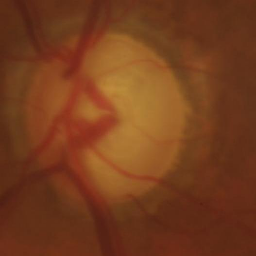

-------------------------------------GLAUCOMA DETECTED---------------------


In [ ]:
import numpy as np
from keras.preprocessing import image
import cv2
from io import BytesIO
from PIL import Image as IM
from google.colab.patches import cv2_imshow
#test_image = image.load_img('/content/drive/My Drive/Colab_Project/glaucoma/test/class0/Im181.jpg', target_size = (256,256))
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  a=IM.open(BytesIO(uploaded[fn]))
  a=cv2.cvtColor(np.float32(a), cv2.COLOR_BGR2RGB)
  test_image=np.array(a)
  test_image = cv2.resize(test_image,(256,256))
  cv2_imshow(test_image)
  #test_image = image.load_img(files.upload(),target_size=(256,256))
  #test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  #training_set.class_indices
  if result[0][0] == 1:
     print("-------------------------------------GLAUCOMA DETECTED---------------------")
  else:
     print("-------------------------------------GLAUCOMA NOT DETECTED-----------------")
